# Anemia Diagnosis Prediction

## Importing Libraries and Loading Datasets

In [6]:
import pandas as pd
import numpy as np

In [8]:
#https://www.kaggle.com/datasets/zeesolver/uhygtttt/data
anemia_df=pd.read_csv("anemia_diagnosis.csv")

## Preprocessing and Exploratory Data Analysis

In [10]:
anemia_df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [11]:
#number column redundant and unnecessary
anemia_df.drop("Number", axis=1, inplace=True)
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No


In [12]:
anemia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           104 non-null    object 
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


In [13]:
anemia_df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


In [14]:
anemia_df.isnull().sum()

Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [15]:
anemia_df["Sex"].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

In [16]:
#remove leading and trailing spaces
anemia_df['Sex']=df["Sex"].str.strip()
anemia_df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [17]:
anemia_df.columns

Index(['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic'], dtype='object')

In [18]:
anemia_df["Anaemic"].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

In [19]:
anemia_df["Sex"].value_counts()

Sex
M    55
F    49
Name: count, dtype: int64

## Data Visualization

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#set theme and palette
sns.set_theme(palette="deep")

<Axes: xlabel='Sex', ylabel='count'>

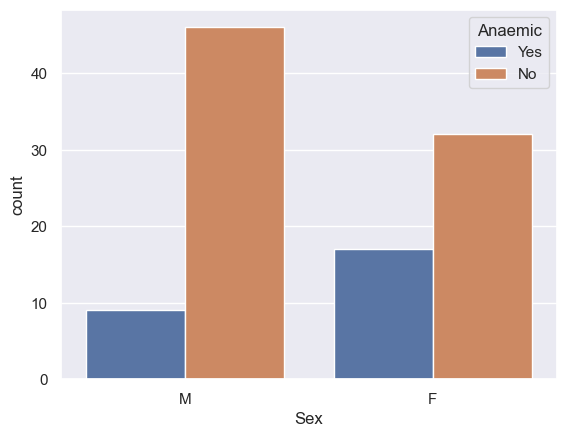

In [22]:
#creating counplot with sex groupby anaemic
sns.countplot(anemia_df, x="Sex", hue="Anaemic")

<Axes: xlabel='Sex', ylabel='Hb'>

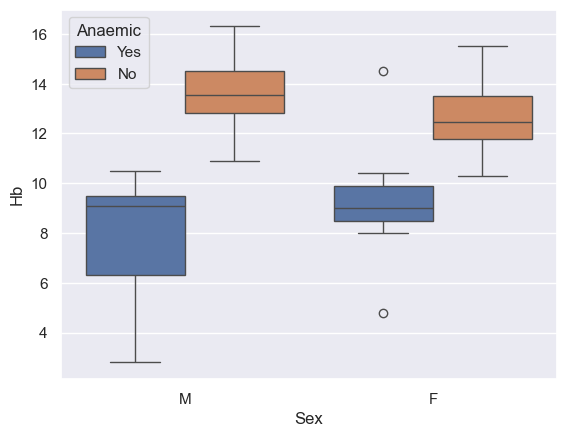

In [23]:
#creating boxplot with Hb value groupby with sex and anaemic
sns.boxplot(anemia_df, x="Sex", y="Hb", hue="Anaemic")

array([[<Axes: title={'center': '%Red Pixel'}>,
        <Axes: title={'center': '%Green pixel'}>],
       [<Axes: title={'center': '%Blue pixel'}>,
        <Axes: title={'center': 'Hb'}>]], dtype=object)

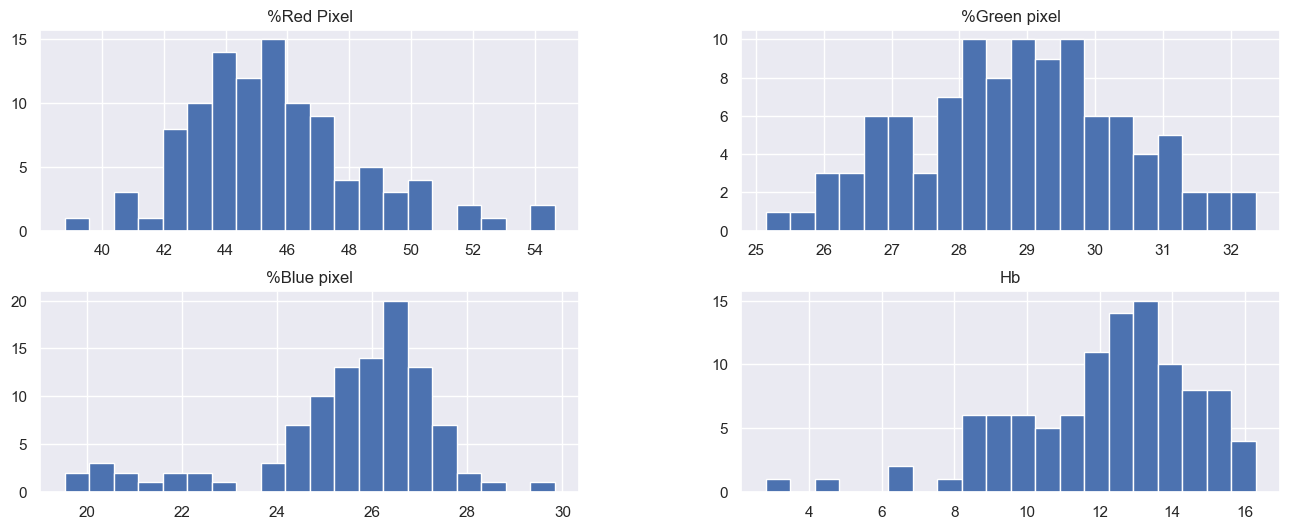

In [25]:
anemia_df.hist(figsize=(16,6), bins=20, )

In [85]:
df.columns

Index(['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic'], dtype='object')

In [32]:
col_names=[]
for i in df.columns:
    if "%" in i or "Hb" in i:
        col_names.append(i)
print(col_names)

['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']


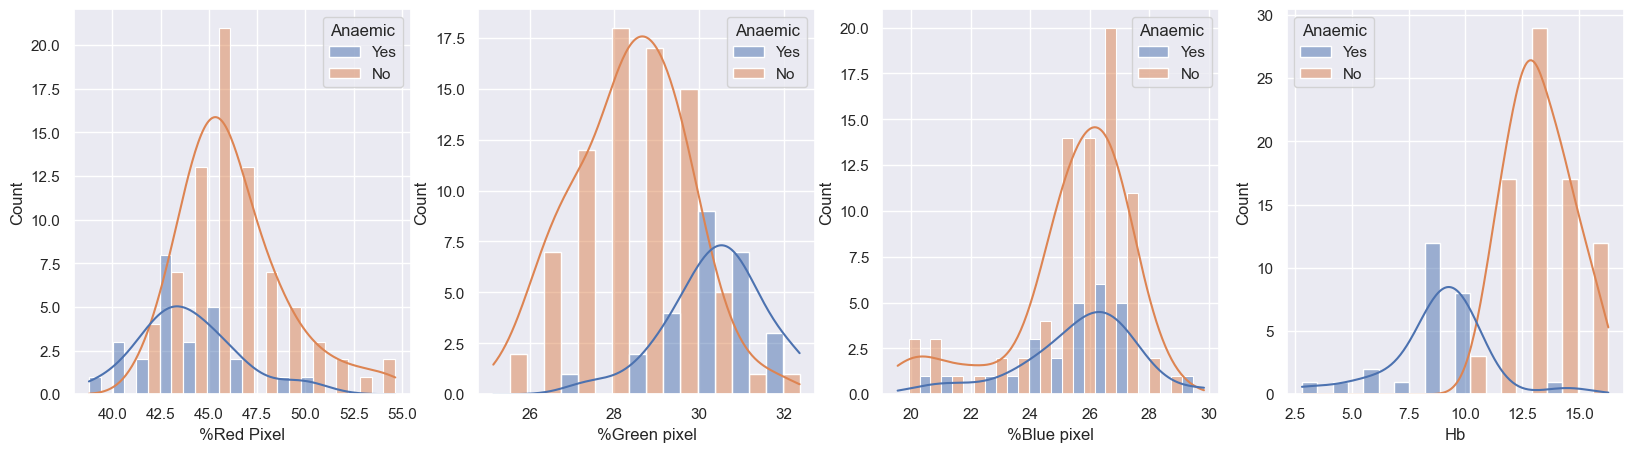

In [46]:
#histogram graphs 
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(col_names):
    sns.histplot(anemia_df, x=column, hue="Anaemic", multiple="dodge", kde=True, ax=axes[i])
plt.show()

## Preparing Data Before Training

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
le=LabelEncoder()
anemia_df["Anaemic"]=le.fit_transform(anemia_df["Anaemic"])

In [49]:
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

No: 0
Yes: 1


In [50]:
le=LabelEncoder()
anemia_df["Sex"]=le.fit_transform(anemia_df["Sex"])

In [51]:
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

F: 0
M: 1


In [52]:
anemia_df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,0,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,1,43.2870,30.6972,26.0158,12.4,0


In [53]:
y=anemia_df["Anaemic"]
x=anemia_df.drop("Anaemic", axis=1)

In [54]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [55]:
x

array([[ 0.94387981, -0.85583785,  1.27140733,  0.21881096, -2.33959306],
       [-1.05945693, -0.018152  , -0.44318177,  0.37282795,  0.53943288],
       [-1.05945693, -0.22958936,  0.05960317,  0.27906087, -0.18032361],
       [-1.05945693, -0.39760464,  0.07395553,  0.50628909,  0.53943288],
       [ 0.94387981, -0.84459878,  1.17772912,  0.27617495,  0.09958169],
       [ 0.94387981, -0.19794155, -0.58896806,  0.74212444,  1.6190676 ],
       [-1.05945693, -0.89501406,  0.83223823,  0.61828304, -1.41990422],
       [-1.05945693, -0.7292466 ,  0.15153582,  0.91614035, -0.74013421],
       [-1.05945693, -0.21831461,  0.1878046 ,  0.16276335,  0.33950052],
       [-1.05945693,  0.30688923, -0.93568732,  0.29728773, -0.98005303],
       [-1.05945693, -0.10831437,  0.1611687 ,  0.02747953,  0.17955464],
       [-1.05945693, -0.4452726 ,  0.03510073,  0.60435974,  1.29917583],
       [-1.05945693, -0.24618038,  1.06827626, -0.48727746, -2.93939013],
       [ 0.94387981, -0.21613815,  1.4

In [56]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=10)

## Model Training 

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
#model building
logr=LogisticRegression()
model=logr.fit(x_train, y_train)

In [59]:
result_test=model.score(x_test, y_test)

In [60]:
result_test

0.96875

## Model  Performance Assessing

In [61]:
y_predict=model.predict(x_test)

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.88      0.93         8

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32



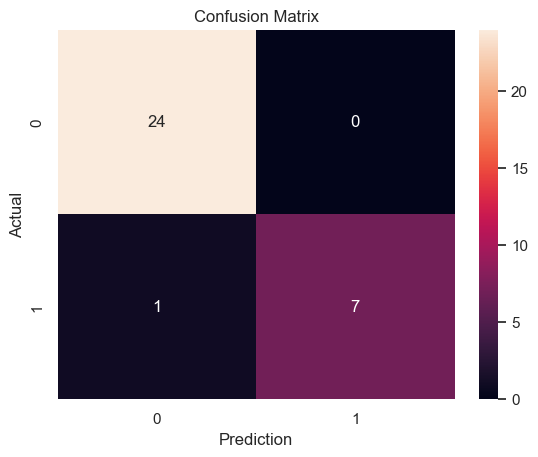

In [69]:
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()